In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV,learning_curve


In [307]:
X_train = pd.read_csv('csv/X_train.csv')
X_test = pd.read_csv('csv/X_test.csv')
y_train = pd.read_csv('csv/y_train.csv')
y_test = pd.read_csv('csv/y_test.csv') 

# Algorithme de régression linéaire Ridge

### Recherche du meilleur alpha

In [308]:

modelRid = make_pipeline( PolynomialFeatures(degree=2,interaction_only=False),GridSearchCV(Ridge(),param_grid={'alpha': [0,0.01,0.05,0.1,1,10,100,300,400,500,1000,10000]},
                                 scoring='r2',
                                 refit=True))

for exp in range(2):
    affinage = modelRid.fit(X_train,y_train)[1].best_params_["alpha"]
    liste_param = [param for param in np.arange(affinage - (affinage/10**(exp+1)),affinage + (affinage/10**(exp+1)), 10**(-exp))]
    modelRid = make_pipeline( PolynomialFeatures(degree=2,interaction_only=False),GridSearchCV(Ridge(),param_grid={'alpha': liste_param},
                                 scoring='r2',
                                 refit=True))

best_alpha = modelRid.fit(X_train,y_train)[1].best_params_["alpha"]
best_alpha


1109.90999999998

In [309]:
# best_alpha=1109.90999999998

# Utilisation du model Ridge

In [310]:
modelRid = make_pipeline( PolynomialFeatures(degree=2),Ridge(alpha=best_alpha))

## Courbe d'apprentissage

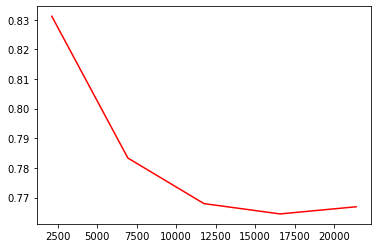

In [331]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(modelRid,X,y, cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1),'r')

plt.show()


## Prédiction

In [312]:
modelRid.fit(X_train,y_train)
modelRid.score(X_train,y_train)

0.7658752693307909

In [330]:
modelRid.score(X_test,y_test)

0.7542302291689894

In [314]:
y_prediction = modelRid.predict(X_test)
df_prediction = pd.DataFrame(y_prediction,columns=["prediction"])

In [315]:
df_prediction["resultat"] = y_test['price']

In [316]:
df_prediction["diff"]= ((df_prediction["resultat"] - df_prediction["prediction"])**2)**(1/2)

In [317]:
df_prediction.describe()

,prediction,resultat,diff
count,4.320000e+03,4.320000e+03,4.320000e+03
mean,5.391945e+05,5.416757e+05,1.273228e+05
std,3.196385e+05,3.639041e+05,1.277948e+05
min,-7.637660e+03,8.400000e+04,5.712212e+01
25%,3.585377e+05,3.250000e+05,4.939073e+04
50%,4.471225e+05,4.550000e+05,9.770799e+04
75%,6.094871e+05,6.513250e+05,1.601295e+05
max,6.202540e+06,7.700000e+06,1.497460e+06


In [318]:
df_prediction

,prediction,resultat,diff
0,3.632362e+05,338900.0,24336.174141
1,4.461921e+05,543000.0,96807.893702
2,4.328652e+05,565000.0,132134.812038
3,1.108246e+06,880000.0,228245.621231
4,6.116331e+05,562000.0,49633.060089
...,...,...,...
4315,4.806087e+05,677900.0,197291.306982
4316,3.392121e+05,192950.0,146262.064877
4317,3.848921e+05,330000.0,54892.050072
4318,3.708504e+05,379900.0,9049.588743


In [319]:
# modelLasso = make_pipeline( PolynomialFeatures(2),GridSearchCV(Lasso(),param_grid={'alpha': [0.0001,0.001,0.01,0.05,0.1,0.5,1],"tol":[0.0001,0.001,0.01,0.05,0.1,0.5,1]},
#                                                                 cv=2,refit=True))
# modelLasso.fit(X_train,y_train)

In [320]:
# modelLasso.score(X_test,y_test)

In [321]:
# prediction = modelLasso.predict(X_test)
# prediction

In [322]:
# modelEN = make_pipeline( PolynomialFeatures(2),GridSearchCV(ElasticNet(),param_grid={'alpha': [0.0001,0.001,0.01,0.05,0.1,0.5,1],"tol":[0.0001,0.001,0.01,0.05,0.1,0.5,1]},
#                                                                 cv=2,refit=True))
# modelEN.fit(X_train,y_train)
# print("")

In [323]:
# modelEN.score(X_test,y_test)

In [324]:
# prediction = modelEN.predict(X_test)
# prediction

# LinearRegression

In [325]:
modelLR = make_pipeline( PolynomialFeatures(1),LinearRegression())
modelLR.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [326]:
modelLR.score(X_test,y_test)

0.7179468740101884

In [327]:
y_lr_prediction = modelLR.predict(X_test)
y_lr_prediction

array([[338760.73266381],
       [408584.73266381],
       [406280.73266381],
       ...,
       [446088.73266381],
       [374728.73266381],
       [337672.73266381]])

# Methode naif

In [328]:
modelDummy = DummyRegressor()
modelDummy.fit(X_train,y_train)
modelDummy.score(X_test,y_test)

-2.5762973467680084e-05

In [329]:
prediction = modelDummy.predict(X_test)
prediction

array([539828.85766381, 539828.85766381, 539828.85766381, ...,
       539828.85766381, 539828.85766381, 539828.85766381])